In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

In [14]:
colors = pd.read_csv("wikipedia_color_names.csv")

In [15]:
# colors.head()
colors.columns

Index(['Name', 'Hex (24 bit)', 'Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)',
       'Hue (degrees)', 'HSL.S (%)', 'HSL.L (%), HSV.S (%), HSV.V (%)'],
      dtype='object')

In [16]:
X = colors[['Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)']].values

In [17]:
y = colors["Name"].values

In [28]:
red = X[y == "Red"]
blue = X[y == "Blue"]
cols = X[:5]

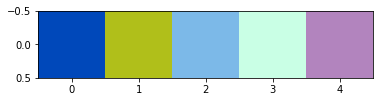

In [29]:
plt.imshow(cols.reshape(1, -1, 3))

In [30]:
cosine_similarity(red, blue)

array([[0.]])

In [31]:
pink = X[y == "Pink"]

In [32]:
cosine_similarity(red, pink)

array([[0.67409856]])

In [33]:
cosine_similarity(blue, pink)

array([[0.53663532]])

In [68]:
cos_sim = np.argsort(cosine_similarity(red, X))

In [69]:
cos_sim

array([[  0, 499, 116, ..., 318, 119, 283]])

In [75]:
top_color_inx = cos_sim[0, -5:]

In [76]:
top_colors = y[top_color_inx]

In [77]:
top_colors

array(['USC Cardinal', 'Deep maroon', 'Dark red', 'Boston University Red',
       'Dark candy apple red'], dtype=object)

In [78]:
top_rgb = X[top_color_inx]

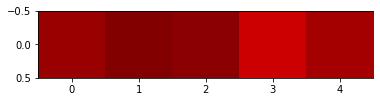

In [79]:
plt.imshow(top_rgb.reshape(1, -1, 3))

In [122]:
near_idx = np.argsort(np.sum((pink - X) ** 2, axis=1))[:10]

In [123]:
near_idx

array([ 909,  148,  217,  822,  636,   58, 1150,  261, 1112,  173])

In [124]:
near_colors = y[near_idx]

In [125]:
near_rgb = X[near_idx]

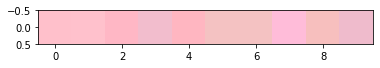

In [126]:
plt.imshow(near_rgb.reshape(1, -1, 3))

In [127]:
near_rgb

array([[255, 192, 203],
       [255, 193, 204],
       [255, 183, 197],
       [242, 189, 205],
       [255, 182, 193],
       [244, 194, 194],
       [244, 194, 194],
       [255, 188, 217],
       [247, 191, 190],
       [239, 187, 204]])

In [128]:
near_colors

array(['Pink', 'Bubble gum', 'Cherry blossom pink', 'Orchid pink',
       'Light pink', 'Baby pink', 'Tea rose', 'Cotton candy',
       'Spanish pink', 'Cameo pink'], dtype=object)

In [133]:
brown = X[y == "Brown"]
brown

array([], shape=(0, 3), dtype=int64)

In [144]:
r_p = (((red - pink)) ** 2) ** 0.5
r_p

array([[  0., 192., 203.]])

In [145]:
red - brown

array([], shape=(0, 3), dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


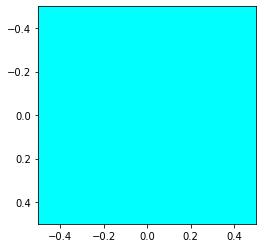

In [146]:
plt.imshow(r_p.reshape(1, -1, 3))